In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:\Pandas\Titanic_Data.csv")

In [3]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
df['Age'] = df[['Age', 'Pclass']].apply(impute_age,axis = 1)

In [4]:
new_data = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = True)

In [5]:
new_data = new_data.dropna()

In [6]:
new_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
sex = pd.get_dummies(new_data['Sex'], drop_first=True)
embark = pd.get_dummies(new_data['Embarked'], drop_first=True)
new_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [8]:
new_data = pd.concat([new_data,sex,embark], axis=1)

In [9]:
x = new_data.drop(['Survived'], axis = 1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Pclass    889 non-null int64
Age       889 non-null float64
SibSp     889 non-null int64
Parch     889 non-null int64
Fare      889 non-null float64
male      889 non-null uint8
Q         889 non-null uint8
S         889 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.3 KB


In [10]:
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
5,3,24.0,0,0,8.4583,1,1,0
6,1,54.0,0,0,51.8625,1,0,1
7,3,2.0,3,1,21.0750,1,0,1
8,3,27.0,0,2,11.1333,0,0,1
9,2,14.0,1,0,30.0708,0,0,0


In [11]:
y = new_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [13]:
x_test.shape

(178, 8)

In [14]:
clf_tree = tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
import graphviz
import pydotplus

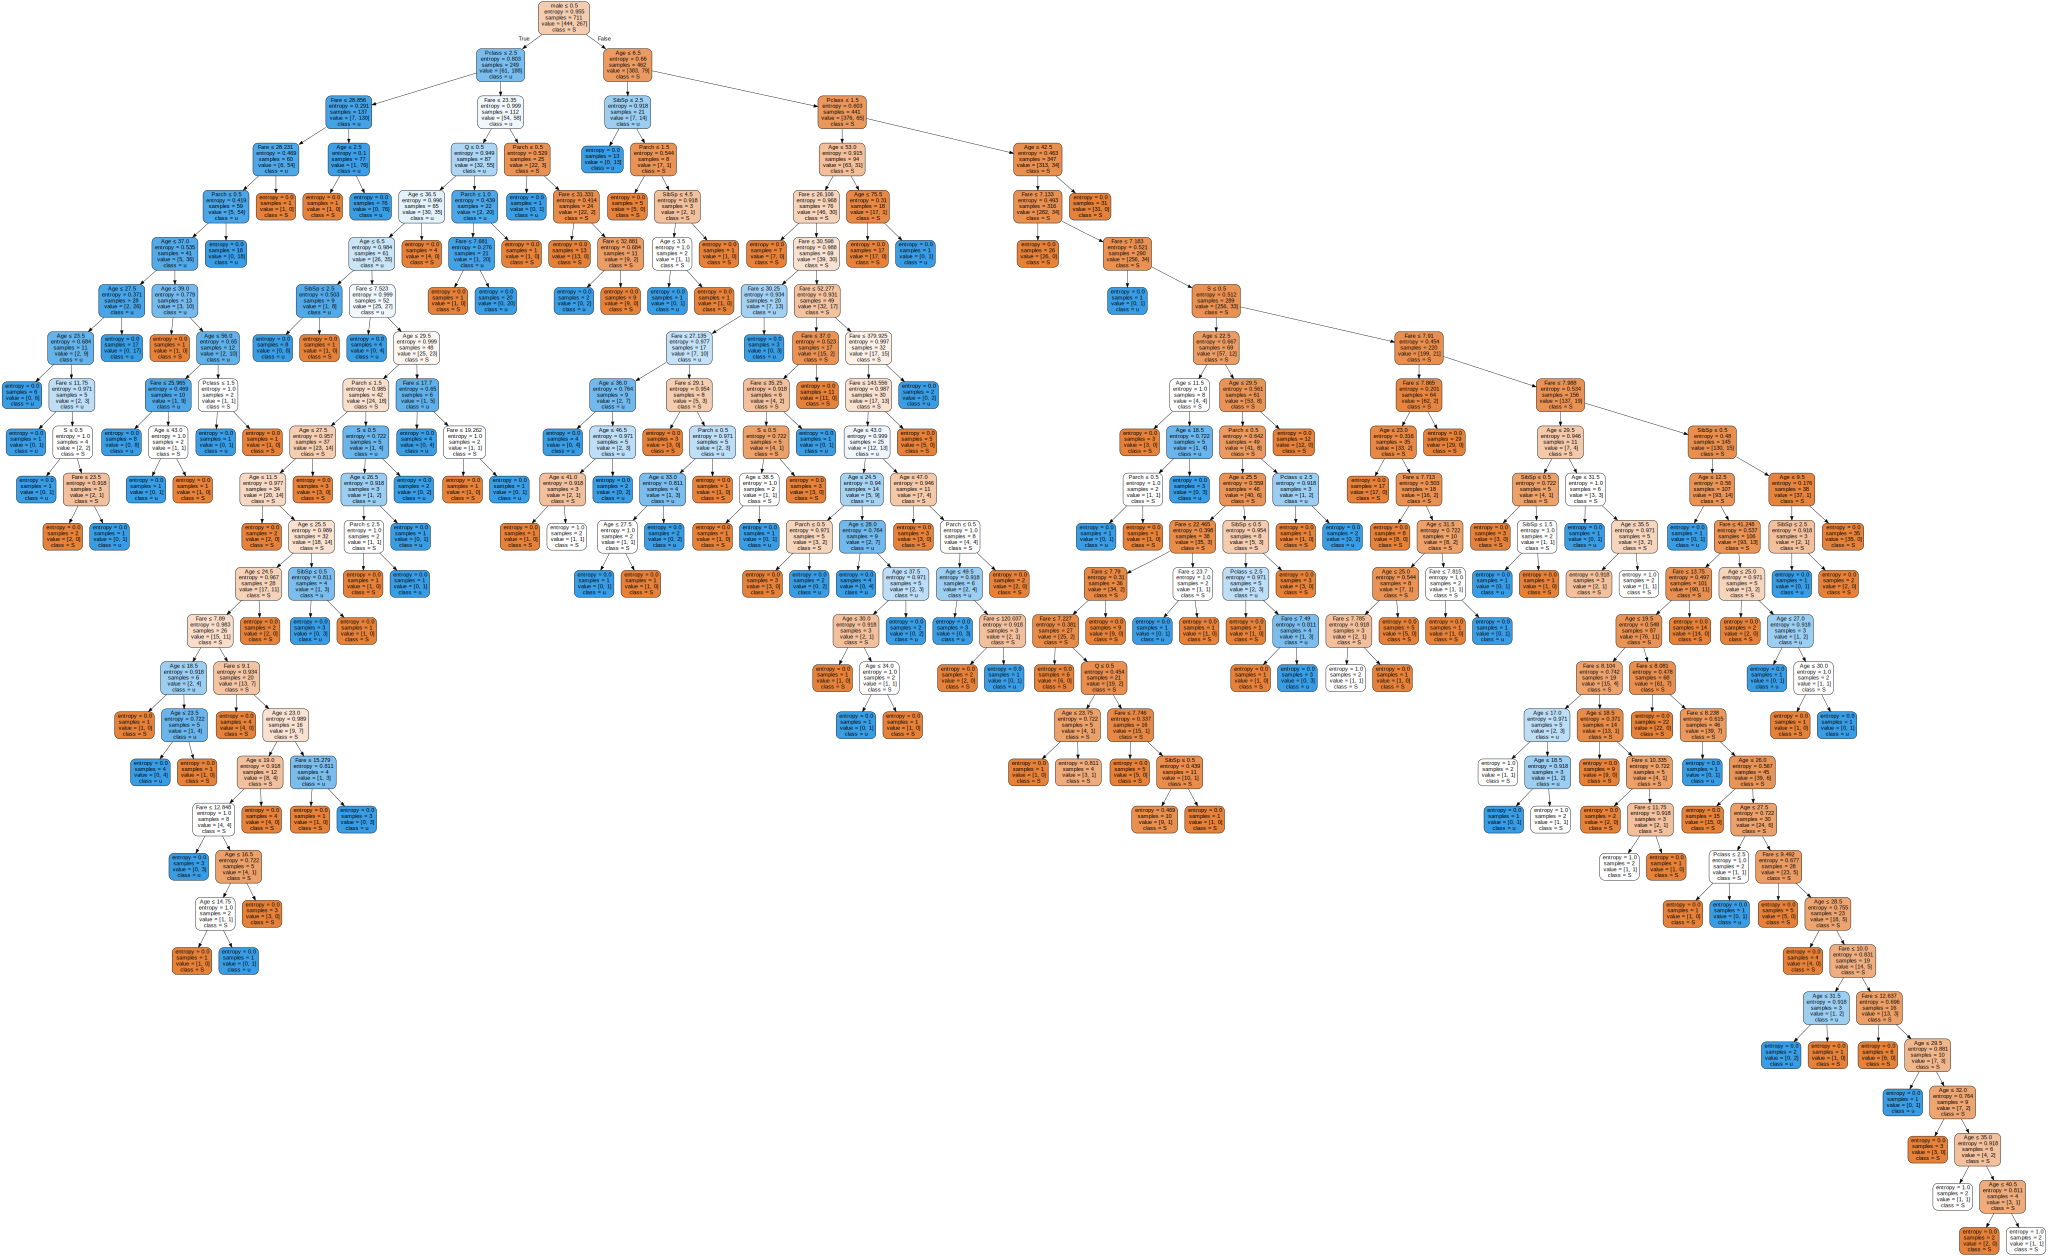

In [17]:
dot_data = tree.export_graphviz(clf_tree, 
                                out_file=None, 
                                feature_names=('Pclass','Age','SibSp','Parch','Fare','male','Q','S'), 
                                class_names=('Survived'),
                                filled = True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph